In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import glob
from glob import glob
import skimage.io as io
import skimage.transform as trans
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import keras
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import cv2


import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name '_registerMatType' from 'cv2.cv2' (C:\Users\hyunj\anaconda3\lib\site-packages\cv2\cv2.cp38-win_amd64.pyd)

# 데이터 정제

In [49]:
# len_data = 300

image = np.zeros((len_data, 256, 256, 3))
label = np.zeros((len_data, 256, 256))

dir_path = 'D:/cube/1300/50/'
resized_dir_path = 'D:/cube_resized/1300/50/'
# label_path = 'D:/cube_resized/1300newlabel/24/'

mix_paths = next(os.walk(resized_dir_path))[2]
for i, mix in tqdm(enumerate(mix_paths), total=len_data):
    img = plt.imread(resized_dir_path + mix)
    image[i] = img[:,:,:3]
#     try:
#         lbl = plt.imread(label_path + 'p' + mix)
#         if lbl.ndim == 3:
#             label[i] = lbl[:,:,:1].reshape(256,256)
#         else:
#             label[i] = lbl
            
#     except:
#         label[i] = np.zeros((256,256))

100%|██████████| 300/300 [00:02<00:00, 138.96it/s]


IndexError: index 300 is out of bounds for axis 0 with size 300

In [47]:
img = plt.imread(dir_path + '0001.png')
img = img.reshape(256,256)
img.shape

ValueError: cannot reshape array of size 36000000 into shape (256,256)

In [43]:
lbl = plt.imread(label_path + 'p' + '0001.png')
lbl[:,:,:1].reshape(256,256)
# lbl.shape

ValueError: cannot reshape array of size 120000 into shape (256,256)

### plot

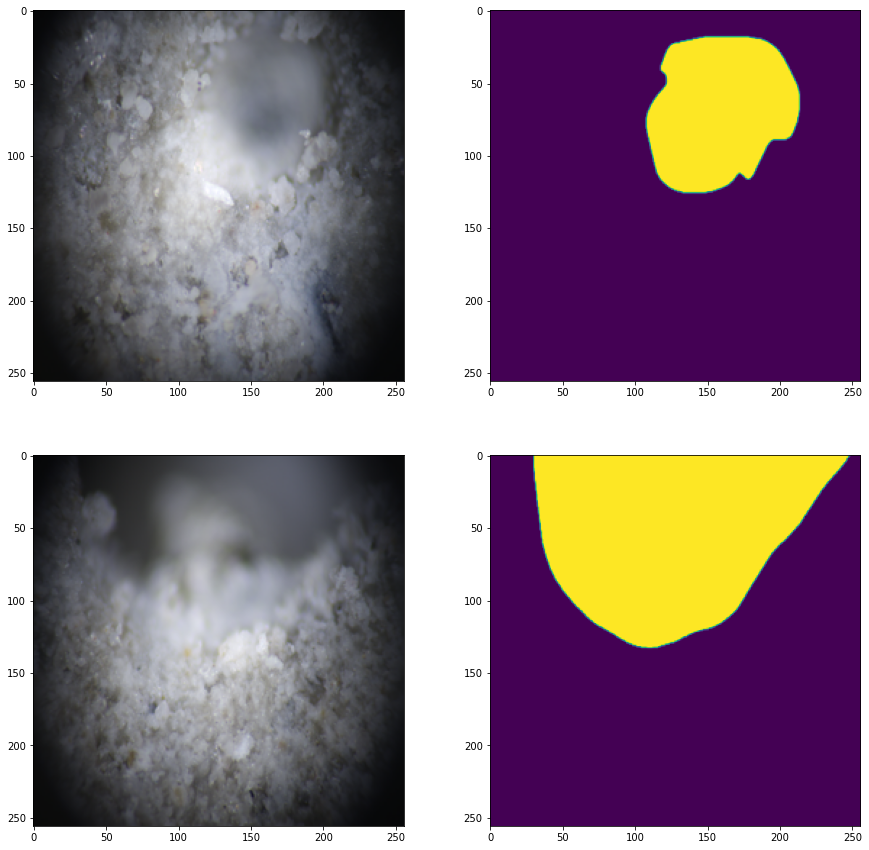

In [52]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(image[1])
plt.subplot(2,2,2)
plt.imshow(label[1])
plt.subplot(2,2,3)
plt.imshow(image[2])
plt.subplot(2,2,4)
plt.imshow(label[2])

### shuffle

In [53]:
num_our_images = image.shape[0]
mask = np.arange(0, num_our_images)
np.random.shuffle(mask)
image = image[mask]
label = label[mask]

### pickle 저장

In [54]:
with open("D:/cube_resized/1300/24image.pkl", "wb") as f:
    pickle.dump(image, f)
with open("D:/cube_resized/1300label/24label.pkl", "wb") as f:
    pickle.dump(label, f)
    
print("image size: {}".format(image.shape))
print("label size: {}".format(label.shape))

image size: (300, 256, 256, 3)
label size: (300, 256, 256)


### pickle 불러오기

In [55]:
import pickle

with open("D:/cube_resized/1300/24image.pkl", "rb") as f:
    our_images = pickle.load(f)
with open("D:/cube_resized/1300label/24label.pkl", "rb") as f:
    our_labels = pickle.load(f)

### training 80%, test 20%

In [56]:
Ntrain = int(our_images.shape[0]*0.8)
Ntest = our_images.shape[0] - Ntrain

In [57]:
x_train = our_images[:Ntrain]
t_train = our_labels[:Ntrain]
x_test = our_images[Ntrain:]
t_test = our_labels[Ntrain:]

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(240, 256, 256, 3)
(240, 256, 256)
(60, 256, 256, 3)
(60, 256, 256)


In [58]:
import skimage.transform as transform

x_train2 = np.zeros((x_train.shape[0]*6,256,256,3))
t_train2 = np.zeros((t_train.shape[0]*6,256,256))

for i in range(x_train.shape[0]):
    x_train2[6*i] = x_train[i]
    x_train2[6*i+1] = transform.rotate(x_train[i], angle = 90, resize = False)
    x_train2[6*i+2] = transform.rotate(x_train[i], angle = 180, resize = False)
    x_train2[6*i+3] = transform.rotate(x_train[i], angle = 270, resize = False)
    x_train2[6*i+4] = x_train[i,::-1,:] #상하반전
    x_train2[6*i+5] = x_train[i,:,::-1] #좌우반전

    t_train2[6*i] = t_train[i]
    t_train2[6*i+1] = transform.rotate(t_train[i], angle = 90, resize = False)
    t_train2[6*i+2] = transform.rotate(t_train[i], angle = 180, resize = False)
    t_train2[6*i+3] = transform.rotate(t_train[i], angle = 270, resize = False)
    t_train2[6*i+4] = t_train[i,::-1,:]
    t_train2[6*i+5] = t_train[i,:,::-1]

x_test2 = np.zeros((x_test.shape[0]*6,256,256,3))
t_test2 = np.zeros((t_test.shape[0]*6,256,256))

for i in range(x_test.shape[0]):
    x_test2[6*i] = x_test[i]
    x_test2[6*i+1] = transform.rotate(x_test[i], angle = 90, resize = False)
    x_test2[6*i+2] = transform.rotate(x_test[i], angle = 180, resize = False)
    x_test2[6*i+3] = transform.rotate(x_test[i], angle = 270, resize = False)
    x_test2[6*i+4] = x_test[i,::-1,:]
    x_test2[6*i+5] = x_test[i,:,::-1]

    t_test2[6*i] = t_test[i]
    t_test2[6*i+1] = transform.rotate(t_test[i], angle = 90, resize = False)
    t_test2[6*i+2] = transform.rotate(t_test[i], angle = 180, resize = False)
    t_test2[6*i+3] = transform.rotate(t_test[i], angle = 270, resize = False)
    t_test2[6*i+4] = t_test[i,::-1,:]
    t_test2[6*i+5] = t_test[i,:,::-1]


In [84]:
len(x_train2), len(t_train2), len(x_test2), len(t_test2)

(1440, 1440, 360, 360)

In [68]:
def unet(pretrained_weights = None,input_size = (256,256,3)):
    inputs = Input(input_size)
    
    # downsampling
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    # upsampling
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    
    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    
    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

#     model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
#     #model.summary()

#     if(pretrained_weights):
#     	model.load_weights(pretrained_weights)

    return model

In [76]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Activation, Flatten, UpSampling2D, concatenate

def Encoder(x, filters=64):

    x = Conv2D(filters,(3,3), kernel_initializer='he_normal', padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters,(3,3), kernel_initializer='he_normal', padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters,(3,3), kernel_initializer='he_normal', padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    pool = MaxPooling2D(pool_size=(2,2))(x)

    return x, pool

def Decoder(x, _c = None, filters=64):

    if _c != None:
        x = concatenate([x,_c],axis = -1)

    x = Conv2D(filters,(3,3), kernel_initializer='he_normal', padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters,(3,3), kernel_initializer='he_normal', padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters,(3,3), kernel_initializer='he_normal', padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = UpSampling2D(size=(2,2))(x)

    return x

def Outblock(x, _c = None, filters=64):

    if _c != None:
        x = concatenate([x, _c], axis=-1)

    x = Conv2D(filters,(3,3), kernel_initializer='he_normal', padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters,(3,3), kernel_initializer='he_normal', padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.3)(x)

    x = Conv2D(filters,(3,3), kernel_initializer='he_normal', padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(16,(3,3), kernel_initializer='he_normal', padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(2,(3,3), kernel_initializer='he_normal', padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation('softmax')(x)

    return x

def UnetSegmentation(input_size=(256,256,3)):

    in1 = Input(shape=input_size)

    inc1,pool1 = Encoder(in1,64) #256, 128
    inc2,pool2 = Encoder(pool1,128) #128, 64
    inc3,pool3 = Encoder(pool2,256) #64, 32
    inc4,pool4 = Encoder(pool3,512) #32, 16

    x = Decoder(pool4,None,1024) #32
    x = Decoder(x, inc4,512) #64
    x = Decoder(x, inc3,256) #128
    x = Decoder(x, inc2,128) #256

    x = Outblock(x,inc1, 64) #256

    model = Model(inputs=[in1],outputs=[x])

    return model

In [77]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

lr = 0.001
mini_batch = 5
mirrored_strategy = tf.distribute.MirroredStrategy()
with mirrored_strategy.scope():
    model = UnetSegmentation()
    model.compile(optimizer=Adam(learning_rate=lr),loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


In [78]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_173 (Conv2D)             (None, 256, 256, 64) 1792        input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_29 (BatchNo (None, 256, 256, 64) 256         conv2d_173[0][0]                 
__________________________________________________________________________________________________
activation_29 (Activation)      (None, 256, 256, 64) 0           batch_normalization_29[0][0]     
____________________________________________________________________________________________

In [111]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, images, labels,
                 to_fit=True, batch_size=32, dim=(256, 256),
                 n_channels=1, n_classes=1, shuffle=True):
        """Initialization
        :param list_IDs: list of all 'label' ids to use in the generator
        :param labels: list of image labels (file names)
        :param image_path: path to images location
        :param mask_path: path to masks location
        :param to_fit: True to return X and y, False to return X only
        :param batch_size: batch size at each iteration
        :param dim: tuple indicating image dimension
        :param n_channels: number of image channels
        :param n_classes: number of output masks
        :param shuffle: True to shuffle label indexes after every epoch
        """
        self.images = images
        self.labels = labels
        self.to_fit = to_fit
        self.batch_size = batch_size
        self.dim = dim
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        """Denotes the number of batches per epoch
        :return: number of batches per epoch
        """
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        """Generate one batch of data
        :param index: index of the batch
        :return: X and y when fitting. X only when predicting
        """
        # Generate indexes of the batch
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X = self._generate_X(list_IDs_temp)

        if self.to_fit:
            y = self._generate_y(list_IDs_temp)
            return X, y
        else:
            return X

    def on_epoch_end(self):
        """Updates indexes after each epoch
        """
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def _generate_X(self, list_IDs_temp):
        """Generates data containing batch_size images
        :param list_IDs_temp: list of label ids to load
        :return: batch of images
        """
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] = self._load_grayscale_image(self.image_path + self.labels[ID])

        return X

    def _generate_y(self, list_IDs_temp):
        """Generates data containing batch_size masks
        :param list_IDs_temp: list of label ids to load
        :return: batch if masks
        """
        y = np.empty((self.batch_size, *self.dim), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            y[i,] = self._load_grayscale_image(self.mask_path + self.labels[ID])

        return y

    def _load_grayscale_image(self, image_path):
        """Load grayscale image
        :param image_path: path to image to load
        :return: loaded image
        """
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img / 255
        return img

In [112]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = DataGenerator(x_train2[:1000], t_train2[:1000])
valid_datagen = DataGenerator(x_train2[1000:], t_train2[1000:])

history = model.fit_generator(
                    train_datagen,
                    validation_data=valid_datagen,
                    use_multiprocessing=True,
                    epochs=10)

TypeError: __init__() missing 2 required positional arguments: 'image_path' and 'mask_path'

In [90]:
# mcp_save = keras.callbacks.ModelCheckpoint("cnn_param.h5",save_best_only=True,monitor="val_accuracy",mode="max")
# hist = model.fit(x_train2,t_train2,batch_size=mini_batch,validation_data=(x_test2,t_test2),epochs=100,callbacks=[mcp_save])


#결과 분석
pred_val=np.zeros_like(t_test2)
for i in range(x_test2.shape[0]//mini_batch+1):
    pred_val[mini_batch*i:mini_batch*(i+1)]=np.argmax(model.predict(x_test2[mini_batch*i:mini_batch*(i+1)]),axis=3)


plt.figure(figsize=(15,15))
plt.subplot(2,3,1)
plt.imshow(x_test2[2])
plt.subplot(2,3,2)
plt.imshow(t_test2[2])
plt.subplot(2,3,3)
plt.imshow(pred_val[2])

plt.subplot(2,3,4)
plt.imshow(x_test2[3])
plt.subplot(2,3,5)
plt.imshow(t_test2[3])
plt.subplot(2,3,6)
plt.imshow(pred_val[3])

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [89]:
help(unet)

Help on function unet in module __main__:

unet(pretrained_weights=None, input_size=(256, 256, 3))



In [103]:
mnist = tf.keras.datasets.mnist

(xt, yt), (xte, yte) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [109]:
xt.shape

(60000, 28, 28)

In [110]:
yt.shape

(60000,)

In [ ]:
X_train_dir = 'D:/cube_resized/1300/24/'
Y_train_dir = 'D:/cube_resized/1300label/24/'
X_train = None
Y_train = None

for image in next(os.walk(X_train_dir))[2]:
    img = Image.open(X_train_dir + image)
    img = img.convert('L')
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    try:
        X_train = np.append(X_train, img, axis=0)
    except:
        X_train = img
    
    
    pore_lbl_path = Y_train_dir + 'p' + image
    try:
        lbl = Image.open(pore_lbl_path)
        lbl = lbl.convert('L')
        lbl = np.array(lbl)
        lbl = np.expand_dims(lbl, axis=0)
        
        try:
            Y_train = np.append(Y_train, lbl, axis=0)
        except:
            Y_train = lbl
    except:
        lbl = np.zeros_like(img)
        
        try:
            Y_train = np.append(Y_train, lbl, axis=0)
        except:
            Y_train = lbl
            
    if len(X_train) == 300:
        break

# resize

In [1]:
# 86 / 50

dir_path = 'D:/cube/86/50/'
resized_dir_path = 'D:/cube_resized/86/50/'

In [4]:
mix_paths = next(os.walk(dir_path))[2]

for n, mix in tqdm(enumerate(mix_paths), total=len(mix_paths)):
    image_path = dir_path + mix
    resized_image_path = resized_dir_path + mix
    
#     if not os.path.exists(resized_image_path):
    img = Image.open(image_path)
    img = img.resize((256,256))
    img.save(resized_image_path)

100%|██████████| 697/697 [04:30<00:00,  2.58it/s]


In [5]:
# 1300 / 50

dir_path = 'D:/cube/1300/50/'
resized_dir_path = 'D:/cube_resized/1300/50/'

mix_paths = next(os.walk(dir_path))[2]

for n, mix in tqdm(enumerate(mix_paths), total=len(mix_paths)):
    image_path = dir_path + mix
    resized_image_path = resized_dir_path + mix
    
#     if not os.path.exists(resized_image_path):
    img = Image.open(image_path)
    img = img.resize((256,256))
    img.save(resized_image_path)

100%|██████████| 578/578 [04:05<00:00,  2.36it/s]


In [7]:
# 86 / 24

dir_path = 'D:/cube//86/24/'
resized_dir_path = 'D:/cube_resized/86/24/'

mix_paths = next(os.walk(dir_path))[2]

for n, mix in tqdm(enumerate(mix_paths), total=len(mix_paths)):
    image_path = dir_path + mix
    resized_image_path = resized_dir_path + mix
    
#     if not os.path.exists(resized_image_path):
    img = Image.open(image_path)
    img = img.resize((256,256))
    img.save(resized_image_path)

100%|██████████| 943/943 [06:06<00:00,  2.57it/s]


In [8]:
# 86 / 35

dir_path = 'D:/cube//86/35/'
resized_dir_path = 'D:/cube_resized/86/35/'

mix_paths = next(os.walk(dir_path))[2]

for n, mix in tqdm(enumerate(mix_paths), total=len(mix_paths)):
    image_path = dir_path + mix
    resized_image_path = resized_dir_path + mix
    
#     if not os.path.exists(resized_image_path):
    img = Image.open(image_path)
    img = img.resize((256,256))
    img.save(resized_image_path)

100%|██████████| 1089/1089 [07:09<00:00,  2.54it/s]


In [17]:
# 1300 / 50

dir_path = 'D:/cube/1300/50/'
resized_dir_path = 'D:/cube_temp_resized/1300/50/'

In [18]:
mix_paths = next(os.walk(dir_path))[2]

for n, mix in tqdm(enumerate(mix_paths), total=len(mix_paths)):
    image_path = dir_path + mix
    resized_image_path = resized_dir_path + mix
    
    if not os.path.exists(resized_image_path):
        img = Image.open(image_path)
        img = img.resize((400,300))
        img.save(resized_image_path)
    break

  0%|          | 0/578 [00:00<?, ?it/s]


In [11]:
# 1300 / 35

dir_path = 'D:/cube/1300/35/'
resized_dir_path = 'D:/cube_temp_resized/1300/35/'

mix_paths = next(os.walk(dir_path))[2]

for n, mix in tqdm(enumerate(mix_paths), total=len(mix_paths)):
    image_path = dir_path + mix
    resized_image_path = resized_dir_path + mix
    
    if not os.path.exists(resized_image_path):
        img = Image.open(image_path)
        img = img.resize((400,300))
        img.save(resized_image_path)

100%|██████████| 1090/1090 [07:42<00:00,  2.35it/s]


In [12]:
# 1300 / 24

dir_path = 'D:/cube/1300/24/'
resized_dir_path = 'D:/cube_temp_resized/1300/24/'

mix_paths = next(os.walk(dir_path))[2]

for n, mix in tqdm(enumerate(mix_paths), total=len(mix_paths)):
    image_path = dir_path + mix
    resized_image_path = resized_dir_path + mix
    
    if not os.path.exists(resized_image_path):
        img = Image.open(image_path)
        img = img.resize((400,300))
        img.save(resized_image_path)

100%|██████████| 1255/1255 [09:35<00:00,  2.18it/s]


In [13]:
# 86 / 24

dir_path = 'D:/cube/86/24/'
resized_dir_path = 'D:/cube_temp_resized/86/24/'

mix_paths = next(os.walk(dir_path))[2]

for n, mix in tqdm(enumerate(mix_paths), total=len(mix_paths)):
    image_path = dir_path + mix
    resized_image_path = resized_dir_path + mix
    
    if not os.path.exists(resized_image_path):
        img = Image.open(image_path)
        img = img.resize((400,300))
        img.save(resized_image_path)

100%|██████████| 943/943 [05:58<00:00,  2.63it/s]


In [14]:
# 86 / 35

dir_path = 'D:/cube/86/35/'
resized_dir_path = 'D:/cube_temp_resized/86/35/'

mix_paths = next(os.walk(dir_path))[2]

for n, mix in tqdm(enumerate(mix_paths), total=len(mix_paths)):
    image_path = dir_path + mix
    resized_image_path = resized_dir_path + mix
    
    if not os.path.exists(resized_image_path):
        img = Image.open(image_path)
        img = img.resize((400,300))
        img.save(resized_image_path)

100%|██████████| 1089/1089 [07:06<00:00,  2.55it/s]


In [15]:
# 86 / 50

dir_path = 'D:/cube/86/50/'
resized_dir_path = 'D:/cube_temp_resized/86/50/'

mix_paths = next(os.walk(dir_path))[2]

for n, mix in tqdm(enumerate(mix_paths), total=len(mix_paths)):
    image_path = dir_path + mix
    resized_image_path = resized_dir_path + mix
    
    if not os.path.exists(resized_image_path):
        img = Image.open(image_path)
        img = img.resize((400,300))
        img.save(resized_image_path)

100%|██████████| 697/697 [04:32<00:00,  2.56it/s]


# threshold

In [38]:
image_path = glob('D:/cube_resized/86/24/*.png')

sum_th1 = 0
sum_dst = 0

for path in tqdm(image_path, total = len(image_path)):
    image_pil = Image.open(path).convert('L')
    image = np.array(image_pil)
    
    
    hist, bin_edges = np.histogram(image, bins=256)

    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]

    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

    mean1 = np.cumsum(hist * bin_mids) / weight1
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    index_of_max_val = np.argmax(inter_class_variance)

    threshold = bin_mids[:-1][index_of_max_val]
    
    
    otsu_threshold, image_result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    maxValue = 255
    th, dst = cv2.threshold(image, otsu_threshold, maxValue, cv2.THRESH_BINARY)
    th1 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 101, 25)
    
    sum_th1 += round(100 - th1.sum()/255/120000*100,2)
    sum_dst += round(100 - dst.sum()/255/120000*100,2)
    
print(sum_th1/len(image_path), sum_dst/len(image_path))

100%|██████████| 943/943 [00:13<00:00, 67.43it/s]

8.662831389183461 18.806330858960752


In [40]:
image_path = glob('D:/cube_resized/86/35/*.png')

sum_th1 = 0
sum_dst = 0

for path in tqdm(image_path, total = len(image_path)):
    image_pil = Image.open(path).convert('L')
    image = np.array(image_pil)
    
    
    hist, bin_edges = np.histogram(image, bins=256)

    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]

    bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

    mean1 = np.cumsum(hist * bin_mids) / weight1
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    index_of_max_val = np.argmax(inter_class_variance)

    threshold = bin_mids[:-1][index_of_max_val]
    
    
    otsu_threshold, image_result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    maxValue = 255
    th, dst = cv2.threshold(image, otsu_threshold, maxValue, cv2.THRESH_BINARY)
    th1 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 101, 25)
    
    sum_th1 += round(100 - th1.sum()/255/120000*100,2)
    sum_dst += round(100 - dst.sum()/255/120000*100,2)
    
print(sum_th1/len(image_path), sum_dst/len(image_path))

100%|██████████| 1089/1089 [00:07<00:00, 143.47it/s]

4.22968778696051 36.740670339761294


In [10]:
image_path = glob('D:/cube_resized/86/35/*.png')
image_path

['D:/cube_resized/86/35\\0001.png',
 'D:/cube_resized/86/35\\0002.png',
 'D:/cube_resized/86/35\\0003.png',
 'D:/cube_resized/86/35\\0004.png',
 'D:/cube_resized/86/35\\0005.png',
 'D:/cube_resized/86/35\\0006.png',
 'D:/cube_resized/86/35\\0007.png',
 'D:/cube_resized/86/35\\0008.png',
 'D:/cube_resized/86/35\\0009.png',
 'D:/cube_resized/86/35\\0010.png',
 'D:/cube_resized/86/35\\0011.png',
 'D:/cube_resized/86/35\\0012.png',
 'D:/cube_resized/86/35\\0013.png',
 'D:/cube_resized/86/35\\0014.png',
 'D:/cube_resized/86/35\\0015.png',
 'D:/cube_resized/86/35\\0016.png',
 'D:/cube_resized/86/35\\0017.png',
 'D:/cube_resized/86/35\\0018.png',
 'D:/cube_resized/86/35\\0019.png',
 'D:/cube_resized/86/35\\0020.png',
 'D:/cube_resized/86/35\\0021.png',
 'D:/cube_resized/86/35\\0022.png',
 'D:/cube_resized/86/35\\0023.png',
 'D:/cube_resized/86/35\\0024.png',
 'D:/cube_resized/86/35\\0025.png',
 'D:/cube_resized/86/35\\0026.png',
 'D:/cube_resized/86/35\\0027.png',
 'D:/cube_resized/86/35\\002

In [11]:
path = image_path[133]

In [12]:
image_pil = Image.open(path).convert('L')
image = np.array(image_pil)

Otsu's algorithm implementation thresholding result:  83.83984375


(Text(0.5, 0, 'pixel values'), Text(0, 0.5, 'variance'))

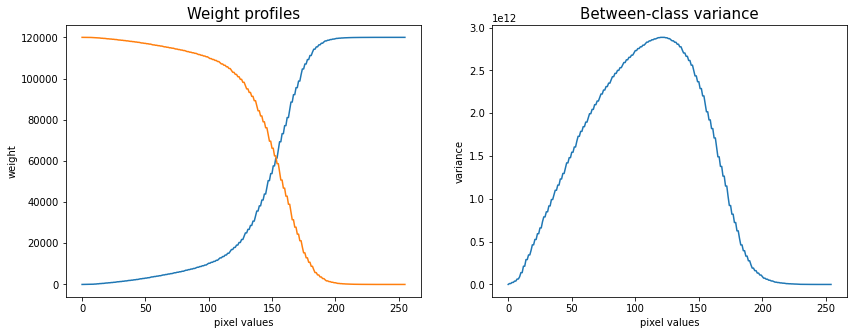

In [13]:
hist, bin_edges = np.histogram(image, bins=256)

weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

mean1 = np.cumsum(hist * bin_mids) / weight1
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
index_of_max_val = np.argmax(inter_class_variance)

threshold = bin_mids[:-1][index_of_max_val]

print("Otsu's algorithm implementation thresholding result: ", threshold)


# Plotting weight and between-class variance
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(weight1)
plt.plot(weight2)
plt.title('Weight profiles',fontsize=15)
plt.xlabel('pixel values'), plt.ylabel('weight')

plt.subplot(122)
plt.plot(inter_class_variance)
plt.title('Between-class variance',fontsize=15)
plt.xlabel('pixel values'), plt.ylabel('variance')

In [14]:
otsu_threshold, image_result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(otsu_threshold)

84.0


(([], []), ([], []))

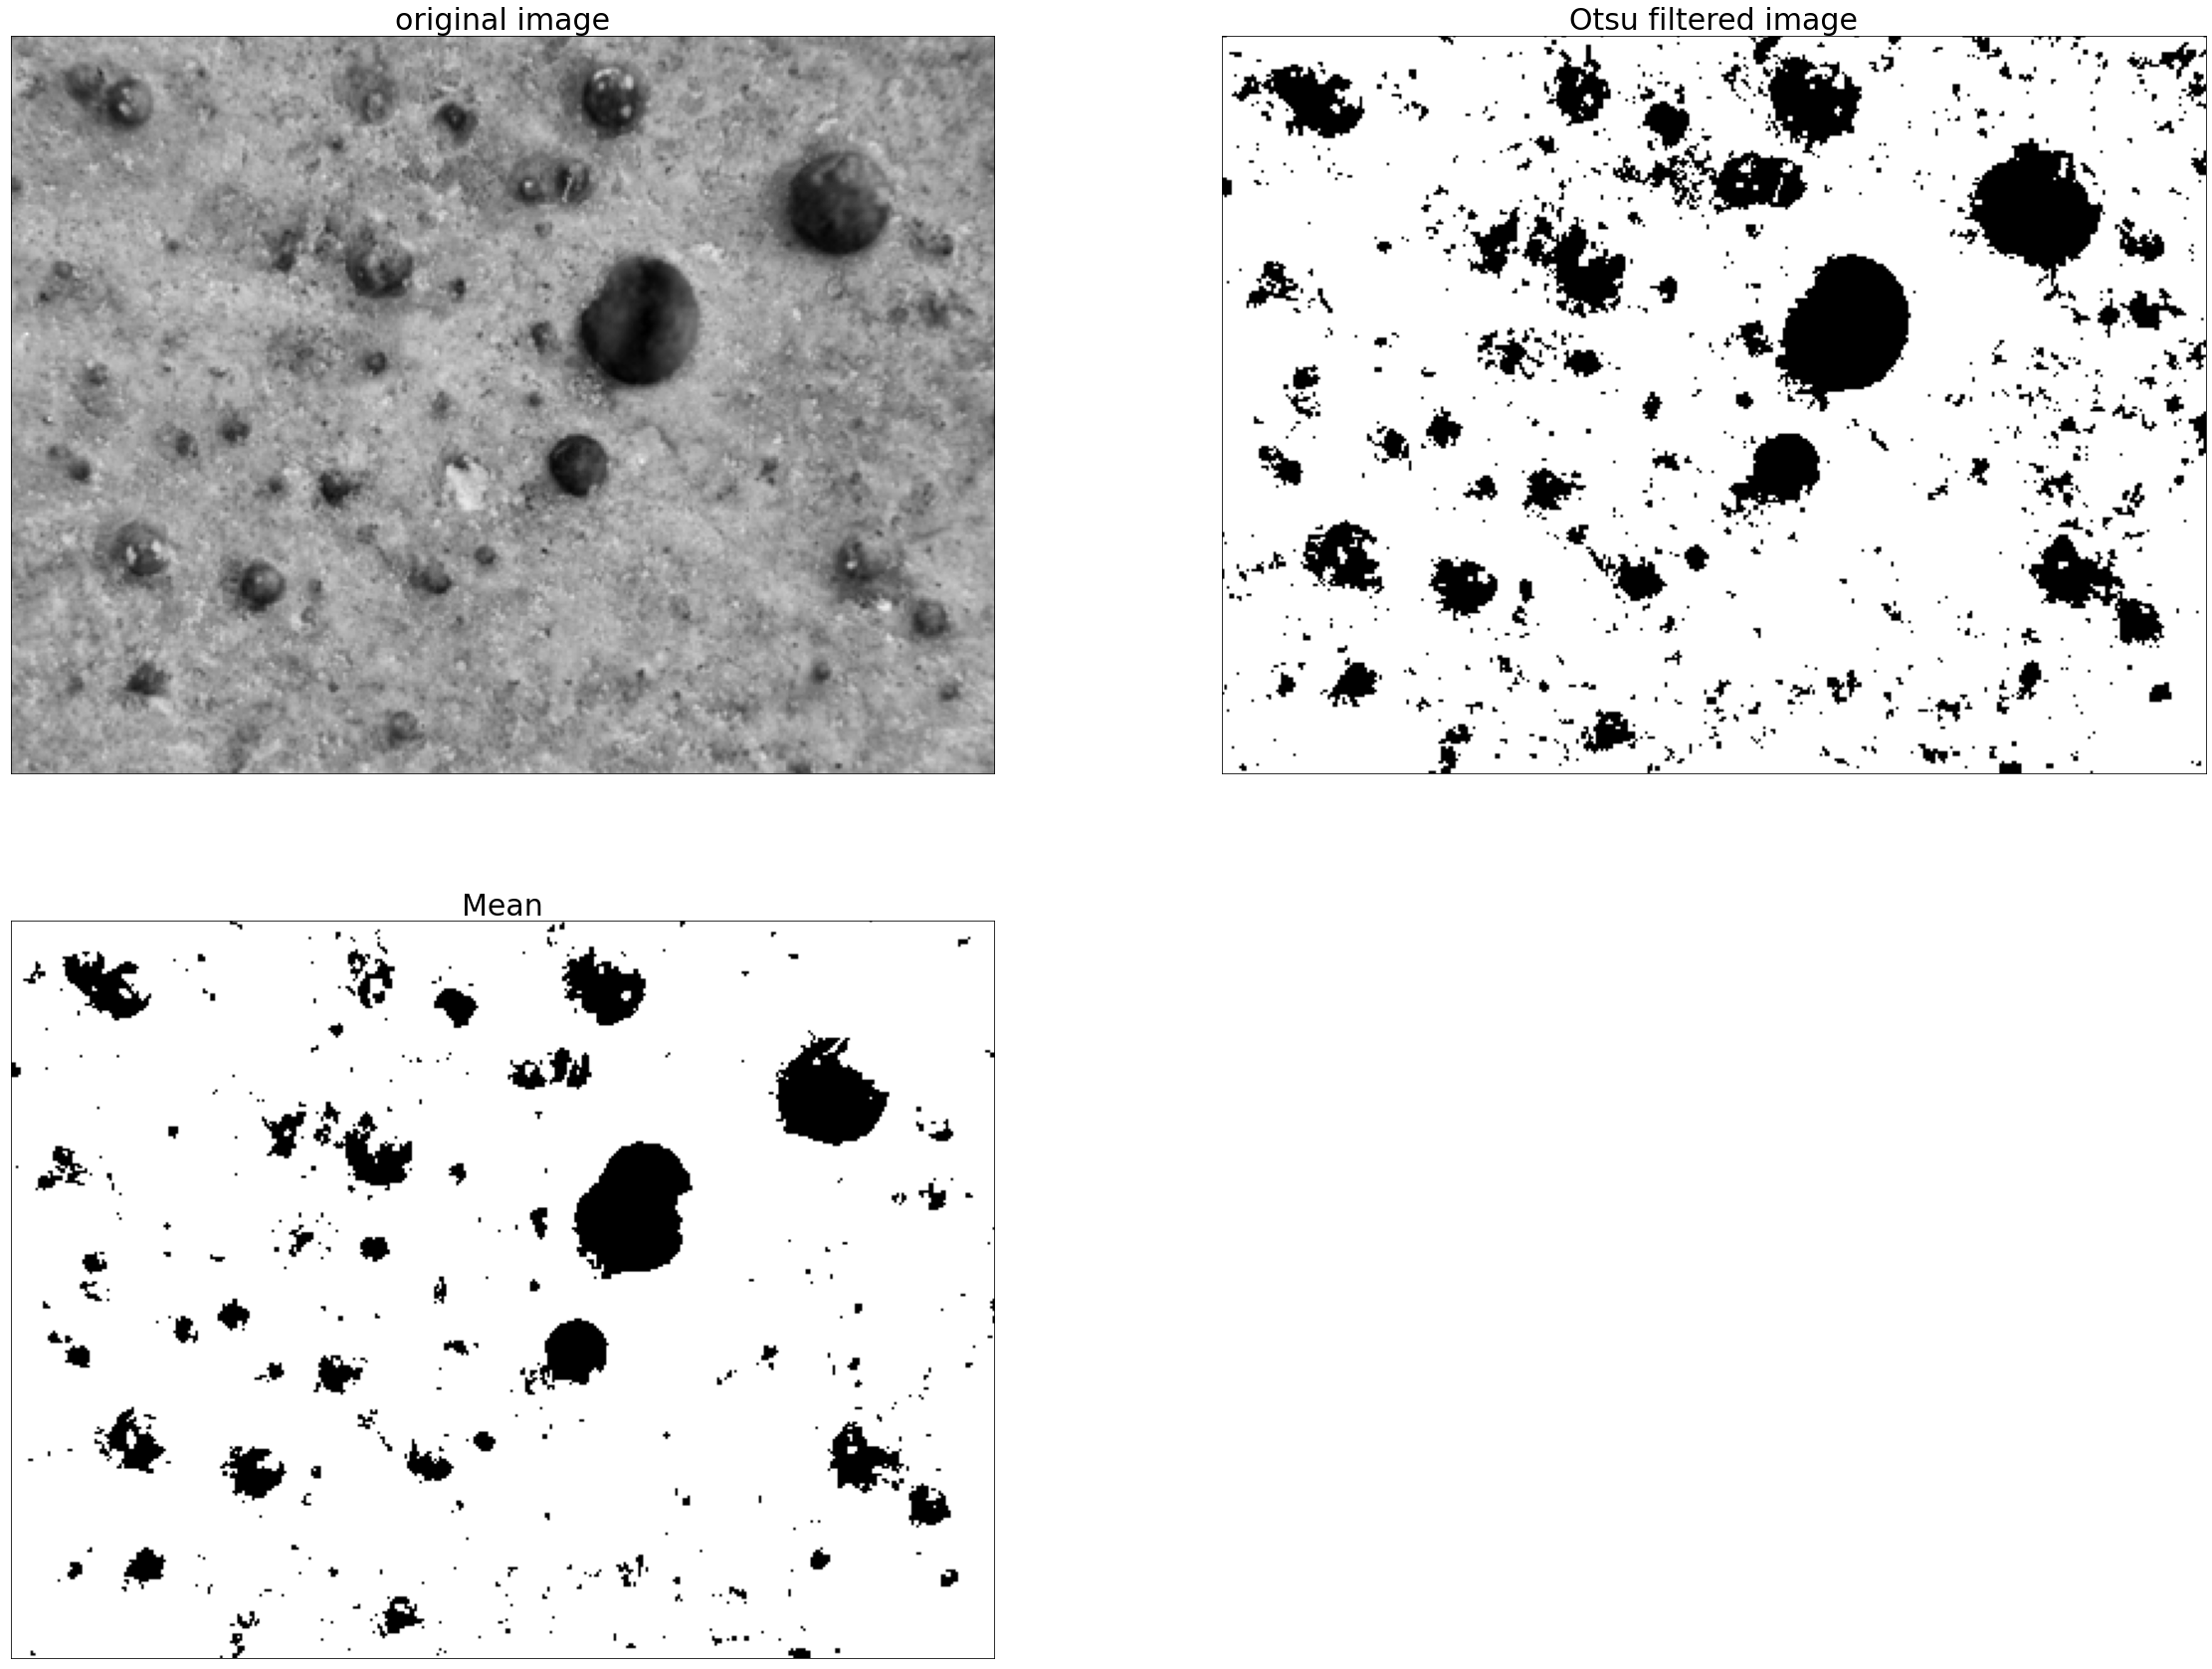

In [33]:
maxValue = 255
th, dst = cv2.threshold(image, otsu_threshold, maxValue, cv2.THRESH_BINARY)
th1 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 101, 25)

plt.figure(figsize=(40,30))
plt.subplot(221),plt.imshow(image, cmap='gray'),plt.title('original image',fontsize=30)
plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(dst,cmap='gray'),plt.title('Otsu filtered image',fontsize=30)
plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(th1,cmap='gray'),plt.title('Mean',fontsize=30)
plt.xticks([]), plt.yticks([])

In [34]:
dst

array([[  0,   0, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [35]:
# 공극률
print('{}%'.format(round(100 - th1.sum()/255/120000*100,2)))

8.49%


In [36]:
print('{}%'.format(round(100 - dst.sum()/255/120000*100,2)))

14.98%


# threshold

In [16]:
image_path = glob('D:/cube_resized/1300/24/*.png')
image_path

['D:/cube_resized/1300/24\\0001.png',
 'D:/cube_resized/1300/24\\0002.png',
 'D:/cube_resized/1300/24\\0003.png',
 'D:/cube_resized/1300/24\\0004.png',
 'D:/cube_resized/1300/24\\0005.png',
 'D:/cube_resized/1300/24\\0006.png',
 'D:/cube_resized/1300/24\\0007.png',
 'D:/cube_resized/1300/24\\0008.png',
 'D:/cube_resized/1300/24\\0009.png',
 'D:/cube_resized/1300/24\\0010.png',
 'D:/cube_resized/1300/24\\0011.png',
 'D:/cube_resized/1300/24\\0012.png',
 'D:/cube_resized/1300/24\\0013.png',
 'D:/cube_resized/1300/24\\0014.png',
 'D:/cube_resized/1300/24\\0015.png',
 'D:/cube_resized/1300/24\\0016.png',
 'D:/cube_resized/1300/24\\0017.png',
 'D:/cube_resized/1300/24\\0018.png',
 'D:/cube_resized/1300/24\\0019.png',
 'D:/cube_resized/1300/24\\0020.png',
 'D:/cube_resized/1300/24\\0021.png',
 'D:/cube_resized/1300/24\\0022.png',
 'D:/cube_resized/1300/24\\0023.png',
 'D:/cube_resized/1300/24\\0024.png',
 'D:/cube_resized/1300/24\\0025.png',
 'D:/cube_resized/1300/24\\0026.png',
 'D:/cube_re

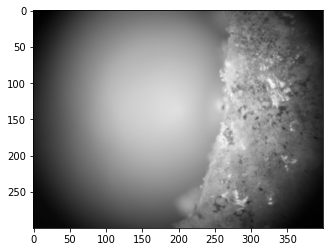

In [17]:
path = image_path[295]
image_pil = Image.open(path).convert('L')
image = np.array(image_pil)

plt.imshow(image, 'gray')
plt.show()

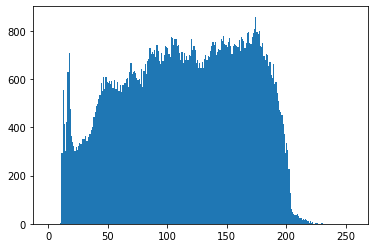

In [18]:
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

Otsu's algorithm implementation thresholding result:  110.572265625


(Text(0.5, 0, 'pixel values'), Text(0, 0.5, 'variance'))

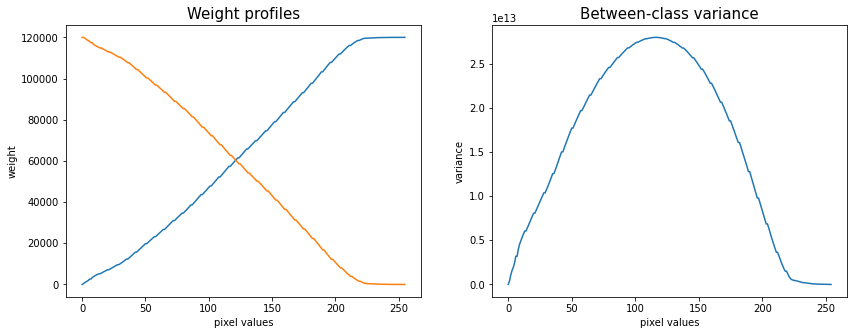

In [19]:
hist, bin_edges = np.histogram(image, bins=256)

weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]

bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.

mean1 = np.cumsum(hist * bin_mids) / weight1
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
index_of_max_val = np.argmax(inter_class_variance)

threshold = bin_mids[:-1][index_of_max_val]

print("Otsu's algorithm implementation thresholding result: ", threshold)


# Plotting weight and between-class variance
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.plot(weight1)
plt.plot(weight2)
plt.title('Weight profiles',fontsize=15)
plt.xlabel('pixel values'), plt.ylabel('weight')

plt.subplot(122)
plt.plot(inter_class_variance)
plt.title('Between-class variance',fontsize=15)
plt.xlabel('pixel values'), plt.ylabel('variance')

In [16]:
otsu_threshold, image_result = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(otsu_threshold)

111.0


(([], []), ([], []))

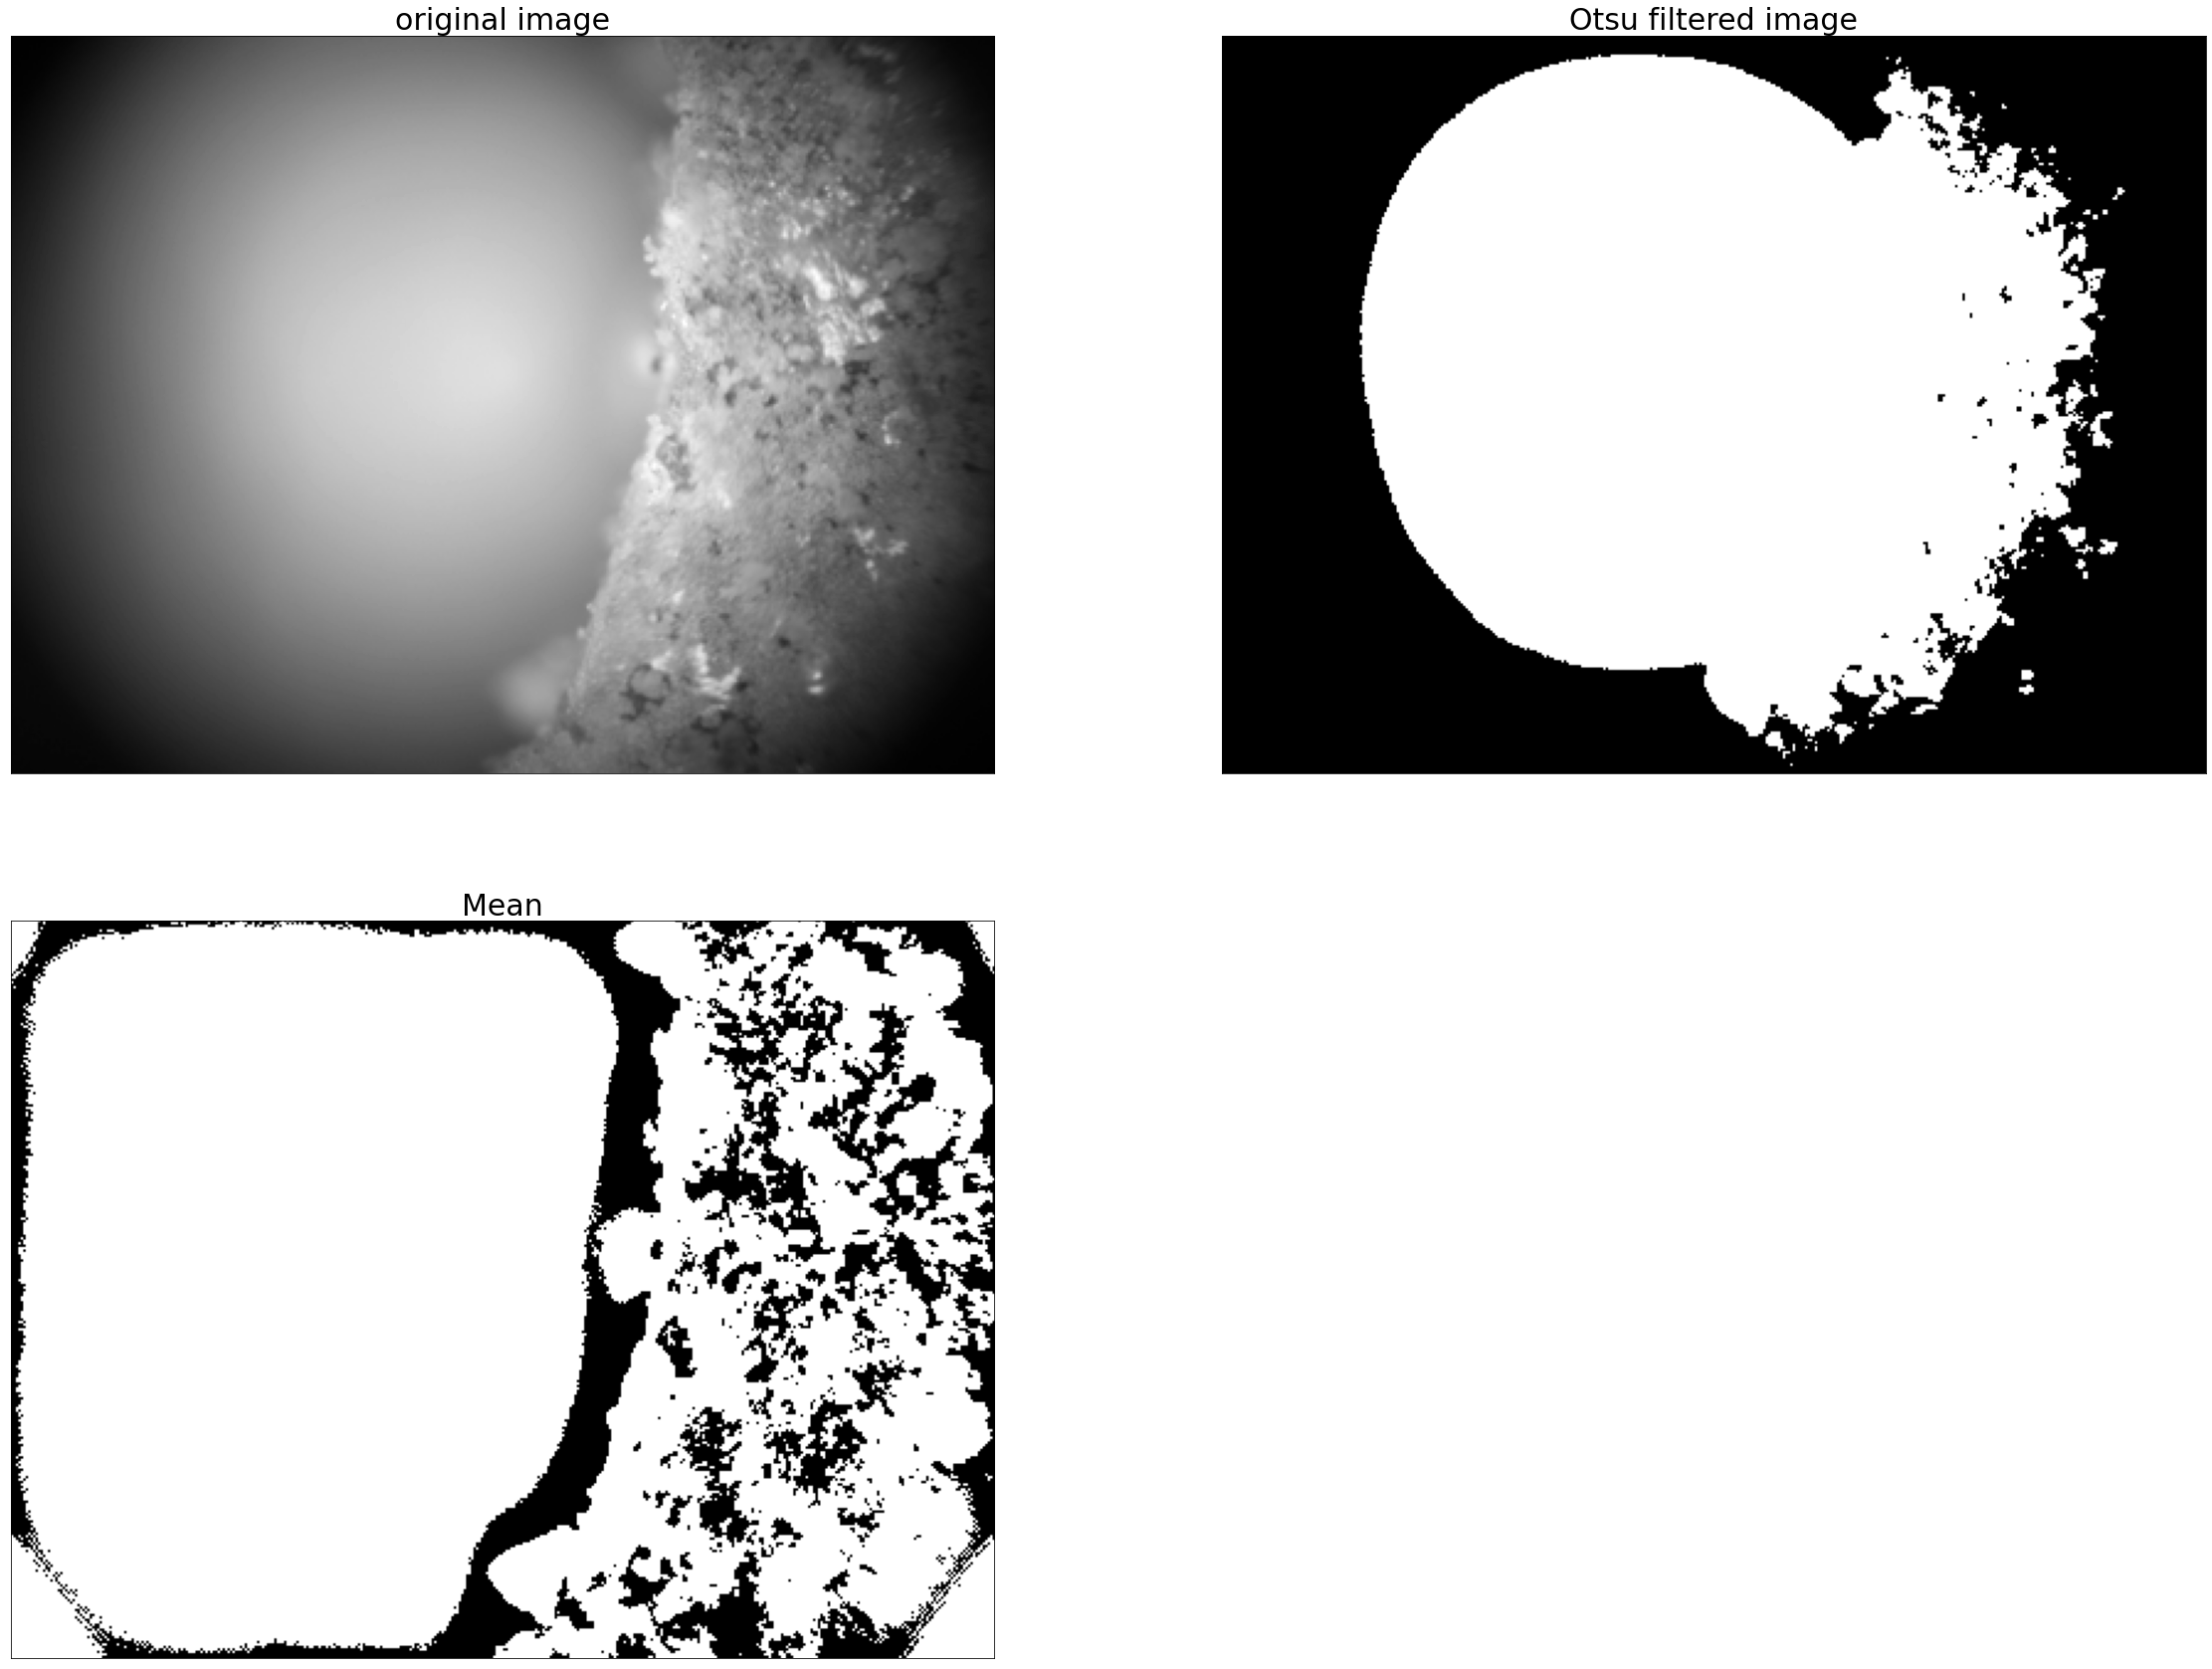

In [24]:
maxValue = 255
th, dst = cv2.threshold(image, otsu_threshold, maxValue, cv2.THRESH_BINARY)
th1 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 5)

plt.figure(figsize=(40,30))
plt.subplot(221),plt.imshow(image, cmap='gray'),plt.title('original image',fontsize=30)
plt.xticks([]), plt.yticks([])

plt.subplot(222),plt.imshow(dst,cmap='gray'),plt.title('Otsu filtered image',fontsize=30)
plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(th1,cmap='gray'),plt.title('Mean',fontsize=30)
plt.xticks([]), plt.yticks([])

In [123]:
np.empty((6), dtype=int)

array([255,   0, 255,   0, 255,   0])

In [41]:
def trainGenerator(batch_size,train_path, image_folder, mask_folder, aug_dict, image_color_mode = "grayscale",
                    mask_color_mode = "grayscale", image_save_prefix  = "image", mask_save_prefix  = "mask",
                    flag_multi_class = False, num_class = 2, save_to_dir = None, target_size = (256,256),
                   seed = 1):
    '''
    can generate image and mask at the same time
    use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
    if you want to visualize the results of generator, set save_to_dir = "your path"
    '''
    image_datagen = ImageDataGenerator(**aug_dict)
    mask_datagen = ImageDataGenerator(**aug_dict)
    image_generator = image_datagen.flow_from_directory(
        train_path,
        classes = [image_folder],
        class_mode = None,
        color_mode = image_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = image_save_prefix,
        seed = seed)
    mask_generator = mask_datagen.flow_from_directory(
        train_path,
        classes = [mask_folder],
        class_mode = None,
        color_mode = mask_color_mode,
        target_size = target_size,
        batch_size = batch_size,
        save_to_dir = save_to_dir,
        save_prefix  = mask_save_prefix,
        seed = seed)
    train_generator = zip(image_generator, mask_generator)
    for (img,mask) in train_generator:
        img,mask = adjustData(img,mask,flag_multi_class,num_class)
        yield (img,mask)

def adjustData(img,mask,flag_multi_class,num_class):
    if(flag_multi_class):
        img = img / 255
        mask = mask[:,:,:,0] if(len(mask.shape) == 4) else mask[:,:,0]
        new_mask = np.zeros(mask.shape + (num_class,))
        for i in range(num_class):
            #for one pixel in the image, find the class in mask and convert it into one-hot vector
            #index = np.where(mask == i)
            #index_mask = (index[0],index[1],index[2],np.zeros(len(index[0]),dtype = np.int64) + i) if (len(mask.shape) == 4) else (index[0],index[1],np.zeros(len(index[0]),dtype = np.int64) + i)
            #new_mask[index_mask] = 1
            new_mask[mask == i,i] = 1
        new_mask = np.reshape(new_mask,(new_mask.shape[0],new_mask.shape[1]*new_mask.shape[2],new_mask.shape[3])) if flag_multi_class else np.reshape(new_mask,(new_mask.shape[0]*new_mask.shape[1],new_mask.shape[2]))
        mask = new_mask
    elif(np.max(img) > 1):
        img = img / 255
        mask = mask /255
        mask[mask > 0.5] = 1
        mask[mask <= 0.5] = 0
    return (img,mask)

In [42]:
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    
    # downsampling
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    # upsampling
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    
    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    
    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [92]:
X_train.shape, Y_train.shape

((300, 300, 400), (300, 300, 400))

In [93]:
import pickle

with open("D:/cube_resized/1300/24image.pkl", "wb") as f:
    pickle.dump(X_train, f)
with open("D:/cube_resized/1300label/24label.pkl", "wb") as f:
    pickle.dump(Y_train, f)

In [136]:
pkl_images

array([[[10, 10, 10, ..., 13, 12, 12],
        [10, 10, 10, ..., 13, 13, 12],
        [10, 10, 10, ..., 13, 13, 13],
        ...,
        [14, 14, 14, ..., 10, 10, 10],
        [14, 13, 13, ..., 10,  9,  9],
        [13, 13, 14, ..., 10,  9,  9]],

       [[ 7,  7,  7, ..., 10, 10,  9],
        [ 7,  7,  7, ...,  9,  9,  9],
        [ 7,  7,  7, ..., 10, 10,  9],
        ...,
        [10, 10, 10, ...,  7,  7,  7],
        [10, 10, 10, ...,  7,  7,  7],
        [10, 10, 10, ...,  7,  7,  7]],

       [[ 7,  7,  7, ..., 10,  9, 10],
        [ 7,  7,  7, ..., 10,  9,  9],
        [ 7,  7,  7, ...,  9,  9,  9],
        ...,
        [10, 10, 10, ...,  7,  7,  7],
        [10, 10, 10, ...,  7,  7,  7],
        [10, 10, 10, ...,  7,  7,  7]],

       ...,

       [[ 6,  6,  5, ...,  8,  8,  7],
        [ 6,  5,  5, ...,  7,  8,  7],
        [ 5,  5,  6, ...,  7,  8,  7],
        ...,
        [ 8,  7,  8, ...,  6,  5,  6],
        [ 8,  8,  8, ...,  5,  5,  5],
        [ 8,  8,  8, ...,  6,  5

In [ ]:
from keras.models import Sequential

# Parameters
params = {'dim': (400, 300),
          'batch_size': 64,
          'n_classes': 1,
          'n_channels': 1,
          'shuffle': True}

# Datasets
partition = # IDs
labels = # Labels

# Generators
training_generator = DataGenerator(partition['train'], labels, **params)
validation_generator = DataGenerator(partition['validation'], labels, **params)

# Design model
model = Sequential()
[...] # Architecture
model.compile()

# Train model on dataset
model.fit_generator(generator=training_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    workers=6)

In [133]:
train_dir = 'D:/cube_resized/'
data_gen_args = dict(horizontal_flip=True,
                    fill_mode='nearest')
myGenerator = trainGenerator(5, train_dir,'1300/24/','1300label/24/',data_gen_args)

model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGenerator,steps_per_epoch=20,epochs=5,callbacks=[model_checkpoint])

TypeError: fit_generator() got multiple values for argument 'steps_per_epoch'